In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib as ta
import FinanceDataReader as fdr
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib inline

In [111]:
kodex200 = fdr.DataReader(symbol='069500', start='20180101', end='20190514')
tiger200 = fdr.DataReader(symbol='102110', start='20180101', end='20190514')
kodexrev = fdr.DataReader(symbol='122630', start='20180101', end='20190514')
kbstar200 = fdr.DataReader(symbol='148020 ', start='20180101', end='20190514')
kodexksd150 = fdr.DataReader(symbol='229200', start='20180101', end='20190514')
kindex200 = fdr.DataReader(symbol='105190', start='20180101', end='20190514')
kodex200tr = fdr.DataReader(symbol='278530', start='20180101', end='20190514')
kodexksp = fdr.DataReader(symbol='226490', start='20180101', end='20190514')
kodexcar = fdr.DataReader(symbol='091180', start='20180101', end='20190514')
kodexsemic= fdr.DataReader(symbol='091160', start='20180101', end='20190514')

In [112]:
kodex200['RSI']=ta.RSI(kodex200['Close'],timeperiod=14)
kodex200['MACD'] = ta.MACD(kodex200['Close'], fastperiod=12, slowperiod=26, signalperiod=9)[0]
#단기이평12일과 26일의 차이를 9일간 지수평균으로 산출한 것. 
#두시그널이 교차할때 단, 장기 이평선의 차이가 가장 크므로 매수, 매도타이밍으로 간주함.
ubb, mbb, lbb = ta.BBANDS(kodex200['Close'], 20, 2)
kodex200['ubb'] = ubb #하한밴드
kodex200['mbb'] = mbb #중심밴드
kodex200['lbb'] = lbb #상한밴드
#볼린저 밴드의 윗선은 저항선이며, 아랫선은 지지선으로 본다. 
#20일선(중간선)은 지지 혹은 저항선으로 경우에 따라 해석한다. 지지선에서 매수하고 저항선에서 매도.
#볼린저 밴드의 폭이 좁아지는 경우, 상하방으로 큰 폭의 움직임이 있을 것으로 해석
a,b=ta.STOCH(high=kodex200['High'],low=kodex200['Low'],close=kodex200['Close'],
                             fastk_period=3,slowk_period=1,slowd_period=1)
kodex200['STOCH'] = a
#스토캐스틱이 50이상이면 상승추세, 50이하이면 하락추세
#다이버전스 상황이라는 주가와 스토캐스틱이 반대로 움직이는 특수한 경우가 있긴함.
#%K곡선(주가수준)과  %D(이동편균선)이 가까울수록 신뢰도가 높음
kodex200['ADX']=ta.ADX(high=kodex200['High'],low=kodex200['Low'],close=kodex200['Close'],timeperiod=14)
#매수매도세 확인
kodex200=kodex200.dropna()

In [113]:
tiger200['RSI']=ta.RSI(tiger200['Close'],timeperiod=14)
tiger200['MACD'] = ta.MACD(tiger200['Close'], fastperiod=12, slowperiod=26, signalperiod=9)[0]
ubb, mbb, lbb = ta.BBANDS(tiger200['Close'], 20, 2)
tiger200['ubb'] = ubb #하한밴드
tiger200['mbb'] = mbb #중심밴드
tiger200['lbb'] = lbb #상한밴드
a,b=ta.STOCH(high=tiger200['High'],low=tiger200['Low'],close=tiger200['Close'],
                             fastk_period=3,slowk_period=1,slowd_period=1)
tiger200['STOCH'] = a
tiger200['ADX']=ta.ADX(high=tiger200['High'],low=tiger200['Low'],close=tiger200['Close'],timeperiod=14)
tiger200=tiger200.dropna()

In [114]:
kodexrev['RSI']=ta.RSI(kodexrev['Close'],timeperiod=14)
kodexrev['MACD'] = ta.MACD(kodexrev['Close'], fastperiod=12, slowperiod=26, signalperiod=9)[0]
ubb, mbb, lbb = ta.BBANDS(kodexrev['Close'], 20, 2)
kodexrev['ubb'] = ubb #하한밴드
kodexrev['mbb'] = mbb #중심밴드
kodexrev['lbb'] = lbb #상한밴드
a,b=ta.STOCH(high=kodexrev['High'],low=kodexrev['Low'],close=kodexrev['Close'],
                             fastk_period=3,slowk_period=1,slowd_period=1)
kodexrev['STOCH'] = a
kodexrev['ADX']=ta.ADX(high=kodexrev['High'],low=kodexrev['Low'],close=kodexrev['Close'],timeperiod=14)
kodexrev=kodexrev.dropna()

In [115]:
kbstar200['RSI']=ta.RSI(kbstar200['Close'],timeperiod=14)
kbstar200['MACD'] = ta.MACD(kbstar200['Close'], fastperiod=12, slowperiod=26, signalperiod=9)[0]
ubb, mbb, lbb = ta.BBANDS(kbstar200['Close'], 20, 2)
kbstar200['ubb'] = ubb #하한밴드
kbstar200['mbb'] = mbb #중심밴드
kbstar200['lbb'] = lbb #상한밴드
a,b=ta.STOCH(high=kbstar200['High'],low=kbstar200['Low'],close=kbstar200['Close'],
                             fastk_period=3,slowk_period=1,slowd_period=1)
kbstar200['STOCH'] = a
kbstar200['ADX']=ta.ADX(high=kbstar200['High'],low=kbstar200['Low'],close=kbstar200['Close'],timeperiod=14)
kbstar200=kbstar200.dropna()

In [116]:
kodexksd150['RSI']=ta.RSI(kodexksd150['Close'],timeperiod=14)
kodexksd150['MACD'] = ta.MACD(kodexksd150['Close'], fastperiod=12, slowperiod=26, signalperiod=9)[0]
ubb, mbb, lbb = ta.BBANDS(kodexksd150['Close'], 20, 2)
kodexksd150['ubb'] = ubb #하한밴드
kodexksd150['mbb'] = mbb #중심밴드
kodexksd150['lbb'] = lbb #상한밴드
a,b=ta.STOCH(high=kodexksd150['High'],low=kodexksd150['Low'],close=kodexksd150['Close'],
                             fastk_period=3,slowk_period=1,slowd_period=1)
kodexksd150['STOCH'] = a
kodexksd150['ADX']=ta.ADX(high=kodexksd150['High'],low=kodexksd150['Low'],close=kodexksd150['Close'],timeperiod=14)
kodexksd150=kodexksd150.dropna()

In [117]:
kindex200['RSI']=ta.RSI(kindex200['Close'],timeperiod=14)
kindex200['MACD'] = ta.MACD(kindex200['Close'], fastperiod=12, slowperiod=26, signalperiod=9)[0]
ubb, mbb, lbb = ta.BBANDS(kindex200['Close'], 20, 2)
kindex200['ubb'] = ubb #하한밴드
kindex200['mbb'] = mbb #중심밴드
kindex200['lbb'] = lbb #상한밴드
a,b=ta.STOCH(high=kindex200['High'],low=kindex200['Low'],close=kindex200['Close'],
                             fastk_period=3,slowk_period=1,slowd_period=1)
kindex200['STOCH'] = a
kindex200['ADX']=ta.ADX(high=kindex200['High'],low=kindex200['Low'],close=kindex200['Close'],timeperiod=14)
kindex200=kindex200.dropna()

In [118]:
kodex200tr['RSI']=ta.RSI(kodex200tr['Close'],timeperiod=14)
kodex200tr['MACD'] = ta.MACD(kodex200tr['Close'], fastperiod=12, slowperiod=26, signalperiod=9)[0]
ubb, mbb, lbb = ta.BBANDS(kodex200tr['Close'], 20, 2)
kodex200tr['ubb'] = ubb #하한밴드
kodex200tr['mbb'] = mbb #중심밴드
kodex200tr['lbb'] = lbb #상한밴드
a,b=ta.STOCH(high=kodex200tr['High'],low=kodex200tr['Low'],close=kodex200tr['Close'],
                             fastk_period=3,slowk_period=1,slowd_period=1)
kodex200tr['STOCH'] = a
kodex200tr['ADX']=ta.ADX(high=kodex200tr['High'],low=kodex200tr['Low'],close=kodex200tr['Close'],timeperiod=14)
kodex200tr=kodex200tr.dropna()

In [119]:
kodexksp['RSI']=ta.RSI(kodexksp['Close'],timeperiod=14)
kodexksp['MACD'] = ta.MACD(kodexksp['Close'], fastperiod=12, slowperiod=26, signalperiod=9)[0]
ubb, mbb, lbb = ta.BBANDS(kodexksp['Close'], 20, 2)
kodexksp['ubb'] = ubb #하한밴드
kodexksp['mbb'] = mbb #중심밴드
kodexksp['lbb'] = lbb #상한밴드
a,b=ta.STOCH(high=kodexksp['High'],low=kodexksp['Low'],close=kodexksp['Close'],
                             fastk_period=3,slowk_period=1,slowd_period=1)
kodexksp['STOCH'] = a
kodexksp['ADX']=ta.ADX(high=kodexksp['High'],low=kodexksp['Low'],close=kodexksp['Close'],timeperiod=14)
kodexksp=kodexksp.dropna()

In [120]:
kodexcar['RSI']=ta.RSI(kodexcar['Close'],timeperiod=14)
kodexcar['MACD'] = ta.MACD(kodexcar['Close'], fastperiod=12, slowperiod=26, signalperiod=9)[0]
ubb, mbb, lbb = ta.BBANDS(kodexcar['Close'], 20, 2)
kodexcar['ubb'] = ubb #하한밴드
kodexcar['mbb'] = mbb #중심밴드
kodexcar['lbb'] = lbb #상한밴드
a,b=ta.STOCH(high=kodexcar['High'],low=kodexcar['Low'],close=kodexcar['Close'],
                             fastk_period=3,slowk_period=1,slowd_period=1)
kodexcar['STOCH'] = a
kodexcar['ADX']=ta.ADX(high=kodexcar['High'],low=kodexcar['Low'],close=kodexcar['Close'],timeperiod=14)
kodexcar=kodexcar.dropna()

In [121]:
kodexsemic['RSI']=ta.RSI(kodexsemic['Close'],timeperiod=14)
kodexsemic['MACD'] = ta.MACD(kodexsemic['Close'], fastperiod=12, slowperiod=26, signalperiod=9)[0]
ubb, mbb, lbb = ta.BBANDS(kodexsemic['Close'], 20, 2)
kodexsemic['ubb'] = ubb #하한밴드
kodexsemic['mbb'] = mbb #중심밴드
kodexsemic['lbb'] = lbb #상한밴드
a,b=ta.STOCH(high=kodexsemic['High'],low=kodexsemic['Low'],close=kodexsemic['Close'],
                             fastk_period=3,slowk_period=1,slowd_period=1)
kodexsemic['STOCH'] = a
kodexsemic['ADX']=ta.ADX(high=kodexsemic['High'],low=kodexsemic['Low'],close=kodexsemic['Close'],timeperiod=14)
kodexsemic=kodexsemic.dropna()

In [14]:
for i in range (0,301,30) :
    kodex200[i:i+30] = kodex200[i:i+30].mean()
for i in range (0,301,30) :
    tiger200[i:i+30] = tiger200[i:i+30].mean()
for i in range (0,301,30) :
    kodexrev[i:i+30] = kodexrev[i:i+30].mean()
for i in range (0,301,30) :
    kbstar200[i:i+30] = kbstar200[i:i+30].mean()
for i in range (0,301,30) :
    kodexksd150[i:i+30] = kodexksd150[i:i+30].mean()
for i in range (0,301,30) :
    kindex200[i:i+30] = kindex200[i:i+30].mean()
for i in range (0,301,30) :
    kodex200tr[i:i+30] = kodex200tr[i:i+30].mean()
for i in range (0,301,30) :
    kodexksp[i:i+30] = kodexksp[i:i+30].mean()
for i in range (0,301,30) :
    kodexcar[i:i+30] = kodexcar[i:i+30].mean()
for i in range (0,301,30) :
    kodexsemic[i:i+30] = kodexsemic[i:i+30].mean()

In [51]:
df1=kodex200.iloc[[3,33,63,93,123,153,183,213,243,273]]
df2=tiger200.iloc[[3,33,63,93,123,153,183,213,243,273]]
df3=kodexrev.iloc[[3,33,63,93,123,153,183,213,243,273]]
df4=kbstar200.iloc[[3,33,63,93,123,153,183,213,243,273]]
df5=kodexksd150.iloc[[3,33,63,93,123,153,183,213,243,273]]
df6=kodexksd150.iloc[[3,33,63,93,123,153,183,213,243,273]]
df7=kodexksd150.iloc[[3,33,63,93,123,153,183,213,243,273]]
df8=kodexksd150.iloc[[3,33,63,93,123,153,183,213,243,273]]
df9=kodexksd150.iloc[[3,33,63,93,123,153,183,213,243,273]]
df10=kodexksd150.iloc[[3,33,63,93,123,153,183,213,243,273]]

In [192]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10],ignore_index=True)

In [193]:
df

,Open,High,Low,Close,Volume,Change,RSI,MACD,ubb,mbb,lbb,STOCH,ADX
0,28747,29082,28747,29089,15057479,0.015677,47.257657,-332.726122,31228.564328,29384.95,27541.335672,101.182432,22.860127
1,28611,28878,28592,28844,4753055,0.006982,47.862568,-125.662402,29877.861000,29088.00,28298.139000,82.909931,17.328237
2,29341,29354,29112,29198,7989593,-0.003107,51.746661,10.867794,29595.951743,29177.25,28758.548257,69.649805,9.899884
3,27075,27375,26996,27292,9153465,0.007345,37.212121,-466.274627,29136.907633,27811.80,26486.692367,87.010955,42.898193
4,26626,26960,26571,26929,5346440,0.010810,43.630309,-211.718823,27774.411450,27158.35,26542.288550,92.345679,32.398945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12710,12945,12555,12558,6012572,-0.012813,34.021428,-21.701989,14096.999857,13398.40,12699.800143,0.480000,30.841413
96,11460,11537,11354,11361,5590220,-0.025977,46.277392,-241.280065,11822.621686,11243.25,10663.878314,34.375000,34.624507
97,10807,11028,10711,11031,9950389,0.018277,45.036795,-98.400637,11555.090952,11170.50,10785.909048,42.723632,18.229382
98,12148,12257,12138,12206,4098695,0.005105,70.365324,240.395296,12389.721360,11658.25,10926.778640,80.308880,31.551707


In [54]:
data1=kodex200.iloc[[3,33,63,93,123,153,183,213,243,273]]
name = ['kodex200_1','kodex200_2','kodex200_3','kodex200_4','kodex200_5','kodex200_6','kodex200_7','kodex200_8','kodex200_9','kodex200_10']
data1 = data1.assign(name = ['kodex200_1','kodex200_2','kodex200_3','kodex200_4','kodex200_5','kodex200_6','kodex200_7','kodex200_8','kodex200_9','kodex200_10'])

In [55]:
data2=tiger200.iloc[[3,33,63,93,123,153,183,213,243,273]]
name = ['tiger200_1','tiger200_2','tiger200_3','tiger200_4','tiger200_5','tiger200_6','tiger200_7','tiger200_8','tiger200_9','tiger200_10']
data2 = data2.assign(name = ['tiger200_1','tiger200_2','tiger200_3','tiger200_4','tiger200_5','tiger200_6','tiger200_7','tiger200_8','tiger200_9','tiger200_10'])

In [56]:
data3=kodexrev.iloc[[3,33,63,93,123,153,183,213,243,273]]
name = ['kodexrev_1','kodexrev_2','kodex200_3','kodex200_4','kodex200_5','kodex200_6','kodex200_7','kodex200_8','kodex200_9','kodex200_10']
data3 = data3.assign(name = ['kodex200_1','kodex200_2','kodex200_3','kodex200_4','kodex200_5','kodex200_6','kodex200_7','kodex200_8','kodex200_9','kodex200_10'])

In [57]:
data4=kbstar200.iloc[[3,33,63,93,123,153,183,213,243,273]]
name = ['kbstar200_1','kbstar200_2','kbstar200_3','kbstar200_4','kbstar200_5','kbstar200_6','kbstar200_7','kbstar200_8','kbstar200_9','kbstar200_10']
data4 = data4.assign(name = ['kbstar200_1','kbstar200_2','kbstar200_3','kbstar200_4','kbstar200_5','kbstar200_6','kbstar200_7','kbstar200_8','kbstar200_9','kbstar200_10'])

In [58]:
data5=kodexksd150.iloc[[3,33,63,93,123,153,183,213,243,273]]
name = ['kodexksd150_1','kodexksd150_2','kodexksd150_3','kodexksd150_4','kodexksd150_5','kodexksd150_6','kodexksd150_7','kodexksd150_8','kodexksd150_9','kodexksd150_10']
data5 = data5.assign(name = ['kodexksd150_1','kodexksd150_2','kodexksd150_3','kodexksd150_4','kodexksd150_5','kodexksd150_6','kodexksd150_7','kodexksd150_8','kodexksd150_9','kodexksd150_10'])

In [59]:
data6=kodexksd150.iloc[[3,33,63,93,123,153,183,213,243,273]]
name = ['kindex200_1','kindex200_2','kindex200_3','kindex200_4','kindex200_5','kindex200_6','kindex200_7','kindex200_8','kindex200_9','kindex200_10']
data6= data6.assign(name = ['kindex200_1','kindex200_2','kindex200_3','kindex200_4','kindex200_5','kindex200_6','kindex200_7','kindex200_8','kindex200_9','kindex200_10'])

In [60]:
data7=kodexksd150.iloc[[3,33,63,93,123,153,183,213,243,273]]
name = ['kodex200tr_1','kodex200tr_2','kodex200tr_3','kodex200tr_4','kodex200tr_5','kodex200tr_6','kodex200tr_7','kodex200tr_8','kodex200tr_9','kodex200tr_10']
data7= data7.assign(name = ['kodex200tr_1','kodex200tr_2','kodex200tr_3','kodex200tr_4','kodex200tr_5','kodex200tr_6','kodex200tr_7','kodex200tr_8','kodex200tr_9','kodex200tr_10'])

In [61]:
data8=kodexksd150.iloc[[3,33,63,93,123,153,183,213,243,273]]
name = ['kodexksp_1','kodexksp_2','kodexksp_3','kodexksp_4','kodexksp_5','kodexksp_6','kodexksp_7','kodexksp_8','kodexksp_9','kodexksp_10']
data8= data8.assign(name = ['kodexksp_1','kodexksp_2','kodexksp_3','kodexksp_4','kodexksp_5','kodexksp_6','kodexksp_7','kodexksp_8','kodexksp_9','kodexksp_10'])

In [62]:
data9=kodexksd150.iloc[[3,33,63,93,123,153,183,213,243,273]]
name = ['kodexcar_1','kodexcar_2','kodexcar_3','kodexcar_4','kodexcar_5','kodexcar_6','kodexcar_7','kodexcar_8','kodexcar_9','kodexcar_10']
data9= data9.assign(name = ['kodexcar_1','kodexcar_2','kodexcar_3','kodexcar_4','kodexcar_5','kodexcar_6','kodexcar_7','kodexcar_8','kodexcar_9','kodexcar_10'])

In [63]:
data10=kodexksd150.iloc[[3,33,63,93,123,153,183,213,243,273]]
name = ['kodexsemic_1','kodexsemic_2','kodexsemic_3','kodexsemic_4','kodexsemic_5','kodexsemic_6','kodexsemic_7','kodexsemic_8','kodexsemic_9','kodexsemic_10']
data10= data10.assign(name = ['kodexsemic_1','kodexsemic_2','kodexsemic_3','kodexsemic_4','kodexsemic_5','kodexsemic_6','kodexsemic_7','kodexsemic_8','kodexsemic_9','kodexsemic_10'])

In [79]:
data = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10],ignore_index=True)

In [194]:
df = df.assign(norisk = [0.015,0.015,0.015,0.015,0.015,0.015,0.0165,0.0175,0.0175,0.0175,0.015,0.015,0.015,0.015,0.015,0.015,0.0165,0.0175,0.0175,0.0175,0.015,0.015,0.015,0.015,0.015,0.015,0.0165,0.0175,0.0175,0.0175,0.015,0.015,0.015,0.015,0.015,0.015,0.0165,0.0175,0.0175,0.0175,0.015,0.015,0.015,0.015,0.015,0.015,0.0165,0.0175,0.0175,0.0175,0.015,0.015,0.015,0.015,0.015,0.015,0.0165,0.0175,0.0175,0.0175,0.015,0.015,0.015,0.015,0.015,0.015,0.0165,0.0175,0.0175,0.0175,0.015,0.015,0.015,0.015,0.015,0.015,0.0165,0.0175,0.0175,0.0175,0.015,0.015,0.015,0.015,0.015,0.015,0.0165,0.0175,0.0175,0.0175,0.015,0.015,0.015,0.015,0.015,0.015,0.0165,0.0175,0.0175,0.0175])
# 중앙은행 기준금리를 무위험수익률로 정하여 열 추가

In [195]:
df_a = df.copy()
df_b = df.copy()

In [201]:
columns=(['Open','High','Low','Close','Volume','Change','RSI','MACD','ubb','mbb','lbb','STOCH','ADX','norisk'])

In [202]:
labels = (['kodex200_1', 'kodex200_2', 'kodex200_3', 'kodex200_4',
       'kodex200_5', 'kodex200_6', 'kodex200_7', 'kodex200_8',
       'kodex200_9', 'kodex200_10', 'tiger200_1', 'tiger200_2',
       'tiger200_3', 'tiger200_4', 'tiger200_5', 'tiger200_6',
       'tiger200_7', 'tiger200_8', 'tiger200_9', 'tiger200_10',
       'kodex200_1', 'kodex200_2', 'kodex200_3', 'kodex200_4',
       'kodex200_5', 'kodex200_6', 'kodex200_7', 'kodex200_8',
       'kodex200_9', 'kodex200_10', 'kbstar200_1', 'kbstar200_2',
       'kbstar200_3', 'kbstar200_4', 'kbstar200_5', 'kbstar200_6',
       'kbstar200_7', 'kbstar200_8', 'kbstar200_9', 'kbstar200_10',
       'kodexksd150_1', 'kodexksd150_2', 'kodexksd150_3', 'kodexksd150_4',
       'kodexksd150_5', 'kodexksd150_6', 'kodexksd150_7', 'kodexksd150_8',
       'kodexksd150_9', 'kodexksd150_10', 'kindex200_1', 'kindex200_2',
       'kindex200_3', 'kindex200_4', 'kindex200_5', 'kindex200_6',
       'kindex200_7', 'kindex200_8', 'kindex200_9', 'kindex200_10',
       'kodex200tr_1', 'kodex200tr_2', 'kodex200tr_3', 'kodex200tr_4',
       'kodex200tr_5', 'kodex200tr_6', 'kodex200tr_7', 'kodex200tr_8',
       'kodex200tr_9', 'kodex200tr_10', 'kodexksp_1', 'kodexksp_2',
       'kodexksp_3', 'kodexksp_4', 'kodexksp_5', 'kodexksp_6',
       'kodexksp_7', 'kodexksp_8', 'kodexksp_9', 'kodexksp_10',
       'kodexcar_1', 'kodexcar_2', 'kodexcar_3', 'kodexcar_4',
       'kodexcar_5', 'kodexcar_6', 'kodexcar_7', 'kodexcar_8',
       'kodexcar_9', 'kodexcar_10', 'kodexsemic_1', 'kodexsemic_2',
       'kodexsemic_3', 'kodexsemic_4', 'kodexsemic_5', 'kodexsemic_6',
       'kodexsemic_7', 'kodexsemic_8', 'kodexsemic_9', 'kodexsemic_10'])

In [203]:
stdsc = StandardScaler()
df_a = pd.DataFrame(stdsc.fit_transform(df_a))#표준화 과정

In [204]:
df_a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.760935,1.778131,1.770040,1.791501,2.590281,0.720692,-0.225954,-1.299048,1.952308,1.818692,1.676187,1.138285,-0.483999,-0.792406
1,1.740171,1.747062,1.746384,1.754223,-0.061116,0.108767,-0.158421,-0.156174,1.751627,1.773845,1.792094,0.544964,-1.037870,-0.792406
2,1.851629,1.819556,1.825746,1.808087,0.771666,-0.601270,0.275199,0.597395,1.709743,1.787324,1.862608,0.114397,-1.781622,-0.792406
3,1.505651,1.518157,1.502806,1.518073,1.071139,0.134300,-1.347437,-2.036160,1.641540,1.581107,1.514663,0.678127,1.522278,-0.792406
4,1.437097,1.454953,1.437943,1.462839,0.091565,0.378176,-0.630911,-0.631156,1.439107,1.482419,1.523178,0.851349,0.471058,-0.792406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.687627,-0.679512,-0.701152,-0.723830,0.262966,-1.284371,-1.703646,0.417629,-0.593019,-0.595681,-0.596862,-2.131597,0.315113,-0.792406
96,-0.878479,-0.893949,-0.884446,-0.905964,0.154292,-2.210791,-0.335390,-0.794318,-0.930935,-0.921163,-0.908673,-1.031002,0.693889,0.528271
97,-0.978180,-0.971469,-0.982580,-0.956176,1.276192,0.903677,-0.473890,-0.005704,-0.970683,-0.932150,-0.889983,-0.759915,-0.947645,1.408721
98,-0.773434,-0.784294,-0.764794,-0.777390,-0.229488,-0.023318,2.353786,1.864257,-0.846678,-0.858487,-0.868408,0.460506,0.386230,1.408721


In [205]:
df_a.index = labels
df_a.columns = columns

In [206]:
df_a['shape'] = df_a['Change']-df_a['norisk']

In [207]:
df_a

,Open,High,Low,Close,Volume,Change,RSI,MACD,ubb,mbb,lbb,STOCH,ADX,norisk,shape
kodex200_1,1.760935,1.778131,1.770040,1.791501,2.590281,0.720692,-0.225954,-1.299048,1.952308,1.818692,1.676187,1.138285,-0.483999,-0.792406,1.513098
kodex200_2,1.740171,1.747062,1.746384,1.754223,-0.061116,0.108767,-0.158421,-0.156174,1.751627,1.773845,1.792094,0.544964,-1.037870,-0.792406,0.901173
kodex200_3,1.851629,1.819556,1.825746,1.808087,0.771666,-0.601270,0.275199,0.597395,1.709743,1.787324,1.862608,0.114397,-1.781622,-0.792406,0.191136
kodex200_4,1.505651,1.518157,1.502806,1.518073,1.071139,0.134300,-1.347437,-2.036160,1.641540,1.581107,1.514663,0.678127,1.522278,-0.792406,0.926706
kodex200_5,1.437097,1.454953,1.437943,1.462839,0.091565,0.378176,-0.630911,-0.631156,1.439107,1.482419,1.523178,0.851349,0.471058,-0.792406,1.170581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kodexsemic_6,-0.687627,-0.679512,-0.701152,-0.723830,0.262966,-1.284371,-1.703646,0.417629,-0.593019,-0.595681,-0.596862,-2.131597,0.315113,-0.792406,-0.491966
kodexsemic_7,-0.878479,-0.893949,-0.884446,-0.905964,0.154292,-2.210791,-0.335390,-0.794318,-0.930935,-0.921163,-0.908673,-1.031002,0.693889,0.528271,-2.739062
kodexsemic_8,-0.978180,-0.971469,-0.982580,-0.956176,1.276192,0.903677,-0.473890,-0.005704,-0.970683,-0.932150,-0.889983,-0.759915,-0.947645,1.408721,-0.505044
kodexsemic_9,-0.773434,-0.784294,-0.764794,-0.777390,-0.229488,-0.023318,2.353786,1.864257,-0.846678,-0.858487,-0.868408,0.460506,0.386230,1.408721,-1.432040


C:\Users\A\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


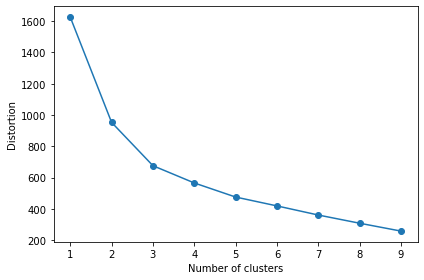

In [208]:
distortions = []
for i in range(1,10) : 
    km = KMeans(n_clusters = i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(df_a)
    distortions.append(km.inertia_)
plt.plot(range(1,10),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()
#엘보우 차트 : 클러스트 내 오차 제곱합의 값이 최소가 되도록 클러스터의 중심을 결정해나가는 방법
#  최적 cluster : 6

In [209]:
km = KMeans(n_clusters=6,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=1)
y_km = km.fit_predict(df_a)

In [210]:
y_km

array([4, 4, 4, 4, 4, 1, 1, 1, 5, 5, 4, 4, 4, 4, 4, 1, 1, 1, 5, 5, 2, 2,
       2, 2, 2, 3, 3, 0, 0, 0, 4, 4, 4, 4, 4, 1, 1, 1, 5, 5, 2, 2, 2, 2,
       2, 3, 3, 0, 0, 0, 2, 2, 2, 2, 2, 3, 3, 0, 0, 0, 2, 2, 2, 2, 2, 3,
       3, 0, 0, 0, 2, 2, 2, 2, 2, 3, 3, 0, 0, 0, 2, 2, 2, 2, 2, 3, 3, 0,
       0, 0, 2, 2, 2, 2, 2, 3, 3, 0, 0, 0])

In [211]:
df_a['cluster']=y_km

In [212]:
df_a

,Open,High,Low,Close,Volume,Change,RSI,MACD,ubb,mbb,lbb,STOCH,ADX,norisk,shape,cluster
kodex200_1,1.760935,1.778131,1.770040,1.791501,2.590281,0.720692,-0.225954,-1.299048,1.952308,1.818692,1.676187,1.138285,-0.483999,-0.792406,1.513098,4
kodex200_2,1.740171,1.747062,1.746384,1.754223,-0.061116,0.108767,-0.158421,-0.156174,1.751627,1.773845,1.792094,0.544964,-1.037870,-0.792406,0.901173,4
kodex200_3,1.851629,1.819556,1.825746,1.808087,0.771666,-0.601270,0.275199,0.597395,1.709743,1.787324,1.862608,0.114397,-1.781622,-0.792406,0.191136,4
kodex200_4,1.505651,1.518157,1.502806,1.518073,1.071139,0.134300,-1.347437,-2.036160,1.641540,1.581107,1.514663,0.678127,1.522278,-0.792406,0.926706,4
kodex200_5,1.437097,1.454953,1.437943,1.462839,0.091565,0.378176,-0.630911,-0.631156,1.439107,1.482419,1.523178,0.851349,0.471058,-0.792406,1.170581,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kodexsemic_6,-0.687627,-0.679512,-0.701152,-0.723830,0.262966,-1.284371,-1.703646,0.417629,-0.593019,-0.595681,-0.596862,-2.131597,0.315113,-0.792406,-0.491966,3
kodexsemic_7,-0.878479,-0.893949,-0.884446,-0.905964,0.154292,-2.210791,-0.335390,-0.794318,-0.930935,-0.921163,-0.908673,-1.031002,0.693889,0.528271,-2.739062,3
kodexsemic_8,-0.978180,-0.971469,-0.982580,-0.956176,1.276192,0.903677,-0.473890,-0.005704,-0.970683,-0.932150,-0.889983,-0.759915,-0.947645,1.408721,-0.505044,0
kodexsemic_9,-0.773434,-0.784294,-0.764794,-0.777390,-0.229488,-0.023318,2.353786,1.864257,-0.846678,-0.858487,-0.868408,0.460506,0.386230,1.408721,-1.432040,0


In [213]:
scaler =preprocessing.MinMaxScaler()
df_b[['RSI','MACD']] = scaler.fit_transform(df_b[['RSI','MACD']])

In [214]:
plt.figure(figsize =(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

C:\Users\A\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


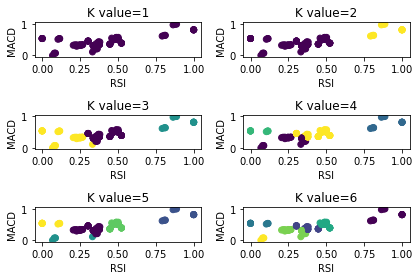

In [215]:
for i in range(1,7) :
    estimator = KMeans(n_clusters = i)
    ids = estimator.fit_predict(df_b[['RSI','MACD']])
    plt.subplot(3,2,i)
    plt.tight_layout()
    plt.title("K value={}".format(i))
    plt.xlabel('RSI')
    plt.ylabel('MACD')
    plt.scatter(df_b['RSI'],df_b['MACD'],c=ids)
plt.show()

In [217]:
import sklearn as sk
import sklearn.cluster as cluster

C:\Users\A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RSI', ylabel='MACD'>

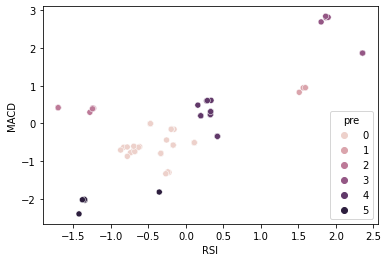

In [225]:
model = cluster.KMeans(6)
model.fit(df_a[["RSI","MACD"]])
df_a["pre"]=model.predict(df_a[["RSI","MACD"]])
sns.scatterplot(df_a["RSI"],df_a["MACD"],hue=df_a["pre"])

In [264]:
from som import Som 
CLUSTERER = Som(x=df_a["shape"],y=df_a["cluster"],input_len=3,sigma=1.0,learning_rate=0.5,random_seed=70)
y_pred = CLUSTERER.fit_predict(df_a)
df["pred"]=y_pred
sns.scatterplot(df_a["shape"],df_a["cluster"],hue=df_a["pred"])

TypeError: unsupported operand type(s) for /: 'method' and 'float'